Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**SEATWORK 6.1** | **Generating Data for Face Recognition**
**Name** | Figueras, Jose Enrico
**Section** | CPE31S3
**Date Performed**: |10/14/23
**Date Submitted**: |10/16/23
**Instructor**: | Engr. Roman M. Richard

<hr>

##Tasks:

Your generated dataset will be used in the Hands-on Activity for this module. So, let's determine the criteria needed. All images you collect must adhere to the follow criteria:

Images will be grayscale in the .pgm format.
Square shape.
All the same size images (200x200) [instructor's note: some datasets have images even smaller than this]
Face must have different expressions.
Your task is simple:

Create a Python script that will detect faces from a video feed and save images in a folder on key press.
OPTION 2: You may also collect images of your face through your phone camera, and pre-process them using openCV to comply with the provided criteria.

<hr>

Question: What can you say about the 3 different datasets above? Provide initial observations. You will need to create similar set of data for Face Recognition.

Answer: These datasets have different test subjects and subject size, the biggest being the Extended Yale or Yale B dataset. And even if all of these datasets have its images converted to grayscale, the quality or image resolution varies depending on what dataset, the lighting conditions also vary.

In [ ]:
import cv2
import os


output_dir = 'face_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

image_size = (200,200)
key = cv2.waitKey(int(1000 / 12)) & 0xff

def save(face, image_counter):
    image_name = f"surname_{image_counter}.pgm"
    cv2.imwrite(image_name, face)


def detect():
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    camera = cv2.VideoCapture(0)
    image_counter = 0

    while (True):
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.2,9)
        for(x,y,w,h) in faces:
            face = gray[y:y + h, x:x + w]
            img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

            cv2.imshow("Camera",frame)
            if key == ord('s'):
                face_resized = cv2.resize(face, image_size)
                save(face_resized, image_counter)
                image_counter += 1

        if key == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    detect()

Sample output:


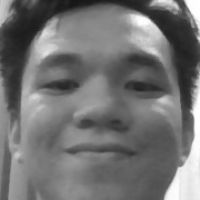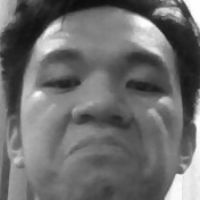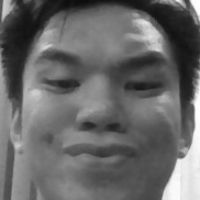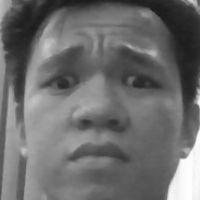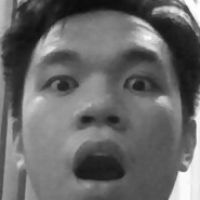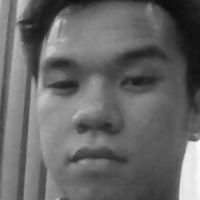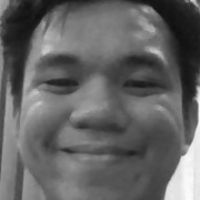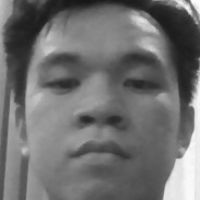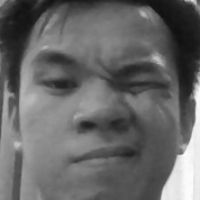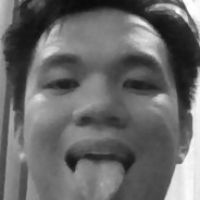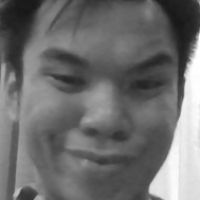